<a href="https://colab.research.google.com/github/Nurochman79/DataScience/blob/main/Drug_prediction_by_Radom_forest_algorithm(with_outlier_handling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this case study we learn how practice **Random forest agorithm** (supervised model-clasifier) to predict the drug.  

**1. We import library and load dataset drug200.csv**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
df=pd.read_csv('/content/drug200.csv')
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
83,38,F,HIGH,NORMAL,11.326,drugA
161,57,F,HIGH,NORMAL,9.945,drugB
121,15,M,HIGH,NORMAL,17.206,drugY
88,37,F,HIGH,NORMAL,23.091,drugY
165,38,M,LOW,HIGH,18.295,drugY
133,24,M,NORMAL,HIGH,25.786,drugY
84,47,F,LOW,HIGH,10.067,drugC
77,26,F,HIGH,NORMAL,19.161,drugY
76,36,F,HIGH,HIGH,11.198,drugA
174,42,M,HIGH,NORMAL,12.766,drugA


**2. Data preprocessing**

In [95]:
df.shape  # We find that thare are 200 rows dan 6 coulmns data

(200, 6)

In [96]:
df.info()    # There is no missing value. Dataset has 4 object type, 1 integer type data and 1 float type data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


We have to change the object type to category type, so we can do encoding and scaling data later

In [97]:
df[['Sex','BP','Cholesterol','Drug']]=df[['Sex','BP','Cholesterol','Drug']].astype('category')

We do ordinal encoding for column 'BP' and 'Cholesterol' because there are leveling value in there . We do enccoding by replace fuction. 

In [98]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [99]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

**Encoding**

In [100]:
dic={'BP':{'HIGH':3,'LOW':1,'NORMAL':2}, 'Cholesterol':{'HIGH':2,'NORMAL':1}}

In [101]:
df=df.replace(dic)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,3,2,25.355,drugY
1,47,M,1,2,13.093,drugC
2,47,M,1,2,10.114,drugC
3,28,F,2,2,7.798,drugX
4,61,F,1,2,18.043,drugY


We do label encoding for 'Sex' column because it has 2 value categories

In [102]:
df['Sex']=df['Sex'].cat.codes

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Sex          200 non-null    int8    
 2   BP           200 non-null    int64   
 3   Cholesterol  200 non-null    int64   
 4   Na_to_K      200 non-null    float64 
 5   Drug         200 non-null    category
dtypes: category(1), float64(1), int64(3), int8(1)
memory usage: 7.0 KB


In [104]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,3,2,25.355,drugY
1,47,1,1,2,13.093,drugC
2,47,1,1,2,10.114,drugC
3,28,0,2,2,7.798,drugX
4,61,0,1,2,18.043,drugY


**Handling Outlier**

We want to see the outlier for each columns

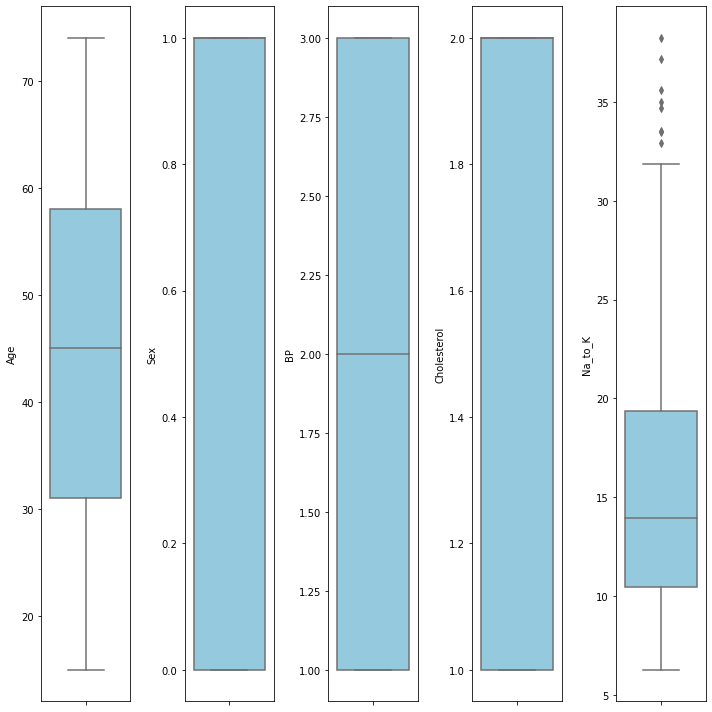

In [105]:
nums=['Age','Sex','BP','Cholesterol','Na_to_K'] # We find only Na_to_K has outlier values
features=nums   
plt.figure(figsize=(10,10))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]],color='skyblue')
    plt.tight_layout()

In [106]:
Q1 = df['Na_to_K'].quantile(0.25) # Finding Q1 value
Q3 = df['Na_to_K'].quantile(0.75) # Finding Q3 value
IQR = Q3-Q1 # Calculating IQR
print('Q1= ', Q1)
print('Q3 = ', Q3)
print('IQR Na_to_K= ', IQR)

Q1=  10.4455
Q3 =  19.38
IQR Na_to_K=  8.9345


In [107]:
nilai_min = df['Na_to_K'].min() # Finding min.value
nilai_max = df['Na_to_K'].max() # Finding max.value
 
min_IQR = Q1 - 1.5 * IQR # Calculating min. IQR
max_IQR = Q3 + 1.5 * IQR # Calculating max. IQR
 
# Conditional to find low outlier
if (nilai_min < min_IQR): 
 print('Low outlier is found <', min_IQR)
 # Showing low outlier index 
 print('Low Outlier Index :', list(df[df['Na_to_K'] < min_IQR].index)) 
 
# Conditional to find high outlier
if (nilai_max > max_IQR):
 print('High outlier is found >', max_IQR)
 # Showing high outlier index 
 print('High outlier Index : ', list(df[df['Na_to_K'] > max_IQR].index)) 

High outlier is found > 32.78175
High outlier Index :  [24, 96, 98, 128, 131, 184, 188, 194]


In [108]:
df=df.drop(df[df.Na_to_K > 32].index, axis=0)

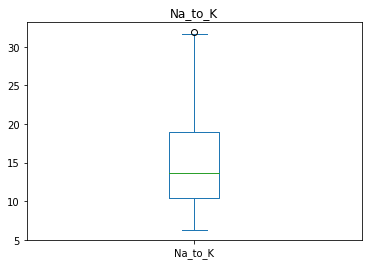

In [109]:
df['Na_to_K'].plot(kind='box')
plt.title('Na_to_K', size=12)
plt.show()

In [110]:
df=df.drop(df[df.Na_to_K > 31].index, axis=0)

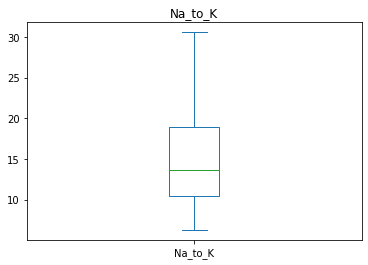

In [111]:
df['Na_to_K'].plot(kind='box')
plt.title('Na_to_K', size=12)
plt.show()

In [114]:
df.reset_index(inplace=True)

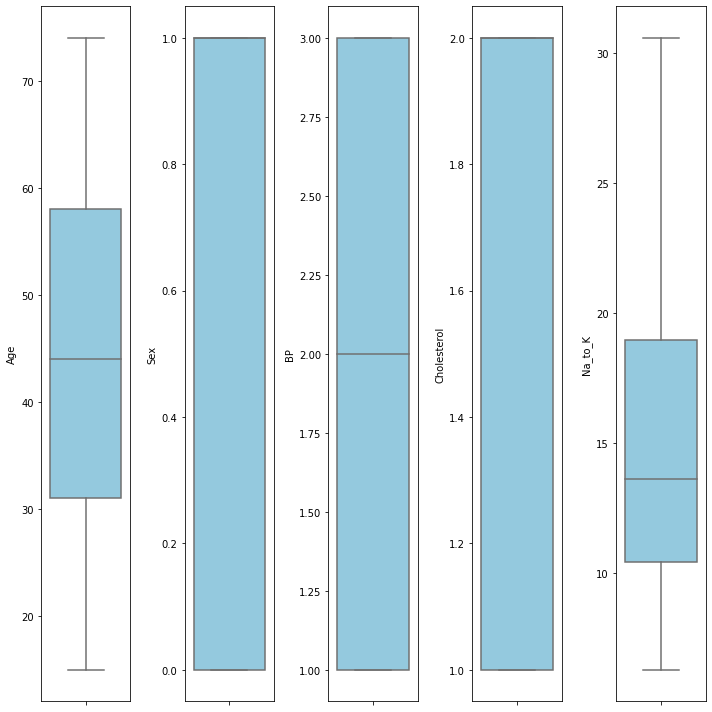

In [115]:
nums=['Age','Sex','BP','Cholesterol','Na_to_K']
features=nums  
plt.figure(figsize=(10,10))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]],color='skyblue')
    plt.tight_layout()

In [116]:
df.shape

(190, 7)

In [83]:
df.head()

,index,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,0,3,2,25.355,drugY
1,1,47,1,1,2,13.093,drugC
2,2,47,1,1,2,10.114,drugC
3,3,28,0,2,2,7.798,drugX
4,4,61,0,1,2,18.043,drugY


In [117]:
df.drop('index', axis=1,inplace=True)

In [119]:
df_features=df.drop('Drug', axis=1)
df_target=df['Drug']
y=df_target

In [123]:
y.head(5)

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: category
Categories (5, object): ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

In [118]:
df_features.shape

(190, 6)

In [120]:
df_features.sample(20)

,Age,Sex,BP,Cholesterol,Na_to_K
130,35,0,3,2,12.894
8,60,1,2,2,15.171
63,29,1,3,2,12.856
162,20,0,3,2,11.262
59,67,1,1,1,20.693
99,22,1,3,1,28.294
141,61,0,1,1,7.340
66,18,0,3,1,24.276
89,29,0,3,2,29.450
12,43,1,1,2,15.376


**Scaling**

We do scaling by Standard Scaler because the dataset already normal distribution 

In [121]:
from sklearn.preprocessing import StandardScaler  # The result is array data
X = StandardScaler().fit(df_features).transform(df_features.astype(float))
X[0:10]

array([[-1.29996247, -1.04303024,  1.12721461,  0.96890428,  1.7108218 ],
       [ 0.15793937,  0.95874497, -1.2791986 ,  0.96890428, -0.33864001],
       [ 0.15793937,  0.95874497, -1.2791986 ,  0.96890428, -0.83654791],
       [-0.99623292, -1.04303024, -0.075992  ,  0.96890428, -1.22364248],
       [ 1.0083821 , -1.04303024, -1.2791986 ,  0.96890428,  0.48869941],
       [-1.36070838, -1.04303024, -0.075992  ,  0.96890428, -1.08842681],
       [ 0.27943119, -1.04303024, -0.075992  ,  0.96890428,  0.19319717],
       [-0.20653609,  0.95874497, -1.2791986 ,  0.96890428, -0.68227836],
       [ 0.94763619,  0.95874497, -0.075992  ,  0.96890428,  0.00867541],
       [-0.08504427,  0.95874497, -1.2791986 , -1.03209369,  0.71015895]])

In [122]:
new_df_features = pd.DataFrame(data=X, columns=features) # Array data have to be transformed to dataframe
new_df_features.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K
0,-1.299962,-1.043030,1.127215,0.968904,1.710822
1,0.157939,0.958745,-1.279199,0.968904,-0.338640
2,0.157939,0.958745,-1.279199,0.968904,-0.836548
3,-0.996233,-1.043030,-0.075992,0.968904,-1.223642
4,1.008382,-1.043030,-1.279199,0.968904,0.488699
5,-1.360708,-1.043030,-0.075992,0.968904,-1.088427
6,0.279431,-1.043030,-0.075992,0.968904,0.193197
7,-0.206536,0.958745,-1.279199,0.968904,-0.682278
8,0.947636,0.958745,-0.075992,0.968904,0.008675
9,-0.085044,0.958745,-1.279199,-1.032094,0.710159


**We do train and split data**

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [127]:
print('X_train')
print(X_train[0:10])
print('\n')
print('y_train')
print(y_train[0:10])


X_train
[[ 1.37285756  0.95874497 -1.2791986  -1.03209369  0.93161849]
 [-0.99623292 -1.04303024 -0.075992    0.96890428 -0.37440781]
 [ 0.09719346  0.95874497 -0.075992   -1.03209369 -1.30938493]
 [-1.78592975 -1.04303024  1.12721461 -1.03209369  0.26840984]
 [-0.75324928 -1.04303024 -0.075992    0.96890428 -1.27729419]
 [-1.23921656  0.95874497  1.12721461 -1.03209369 -0.94334991]
 [ 0.70465255 -1.04303024  1.12721461  0.96890428  1.71750737]
 [ 0.3401771  -1.04303024 -0.075992   -1.03209369 -0.47201715]
 [-0.08504427  0.95874497  1.12721461  0.96890428 -0.19172458]
 [-1.36070838 -1.04303024 -0.075992    0.96890428 -1.08842681]]


y_train
59     drugY
163    drugX
33     drugX
94     drugY
123    drugX
58     drugA
93     drugY
42     drugX
17     drugA
5      drugX
Name: Drug, dtype: category
Categories (5, object): ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']


**Testing data**

In [128]:
print('X_test')
print(X_test[0:10])
print('\n')
print('y_test')
print(y_test[0:10])

X_test
[[ 0.27943119  0.95874497 -1.2791986  -1.03209369 -0.68612257]
 [-1.60369202 -1.04303024  1.12721461 -1.03209369  1.53047852]
 [-0.267282   -1.04303024 -0.075992    0.96890428 -0.83838645]
 [-1.54294611 -1.04303024  1.12721461 -1.03209369  1.81344532]
 [ 0.15793937 -1.04303024 -1.2791986   0.96890428 -0.84440346]
 [-0.8747411  -1.04303024 -0.075992    0.96890428 -0.78155909]
 [-0.32802791  0.95874497 -1.2791986  -1.03209369 -0.19740732]
 [-0.14579018  0.95874497 -1.2791986   0.96890428  0.81796379]
 [-1.36070838  0.95874497  1.12721461 -1.03209369  2.20204414]
 [ 0.70465255  0.95874497 -0.075992    0.96890428 -1.0284238 ]]


y_test
31     drugX
66     drugY
112    drugX
120    drugY
81     drugC
153    drugX
35     drugX
102    drugY
99     drugY
98     drugX
Name: Drug, dtype: category
Categories (5, object): ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']


**Modeling Random Forest**

In [130]:
from sklearn.ensemble import RandomForestClassifier
mod_rf = RandomForestClassifier(n_estimators=80, criterion='entropy')
mod_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=80)

**Prediction data**

In [132]:
y_pred=mod_rf.predict(X_test)

In [133]:
print('prediksi:')
print(y_pred[0:10])
print('\nsebenarnya:')
print(y_test[0:10])


prediksi:
['drugX' 'drugY' 'drugX' 'drugY' 'drugC' 'drugX' 'drugX' 'drugY' 'drugY'
 'drugX']

sebenarnya:
31     drugX
66     drugY
112    drugX
120    drugY
81     drugC
153    drugX
35     drugX
102    drugY
99     drugY
98     drugX
Name: Drug, dtype: category
Categories (5, object): ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']


**Evaluation ML modeling**

In [134]:
from sklearn import metrics
# Menampilkan akurasi
print('Akurasi Random Forest :', metrics.accuracy_score(y_test, y_pred))

Akurasi Random Forest : 1.0


In [135]:
from sklearn.metrics import classification_report
# Menampilkan classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00        13
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



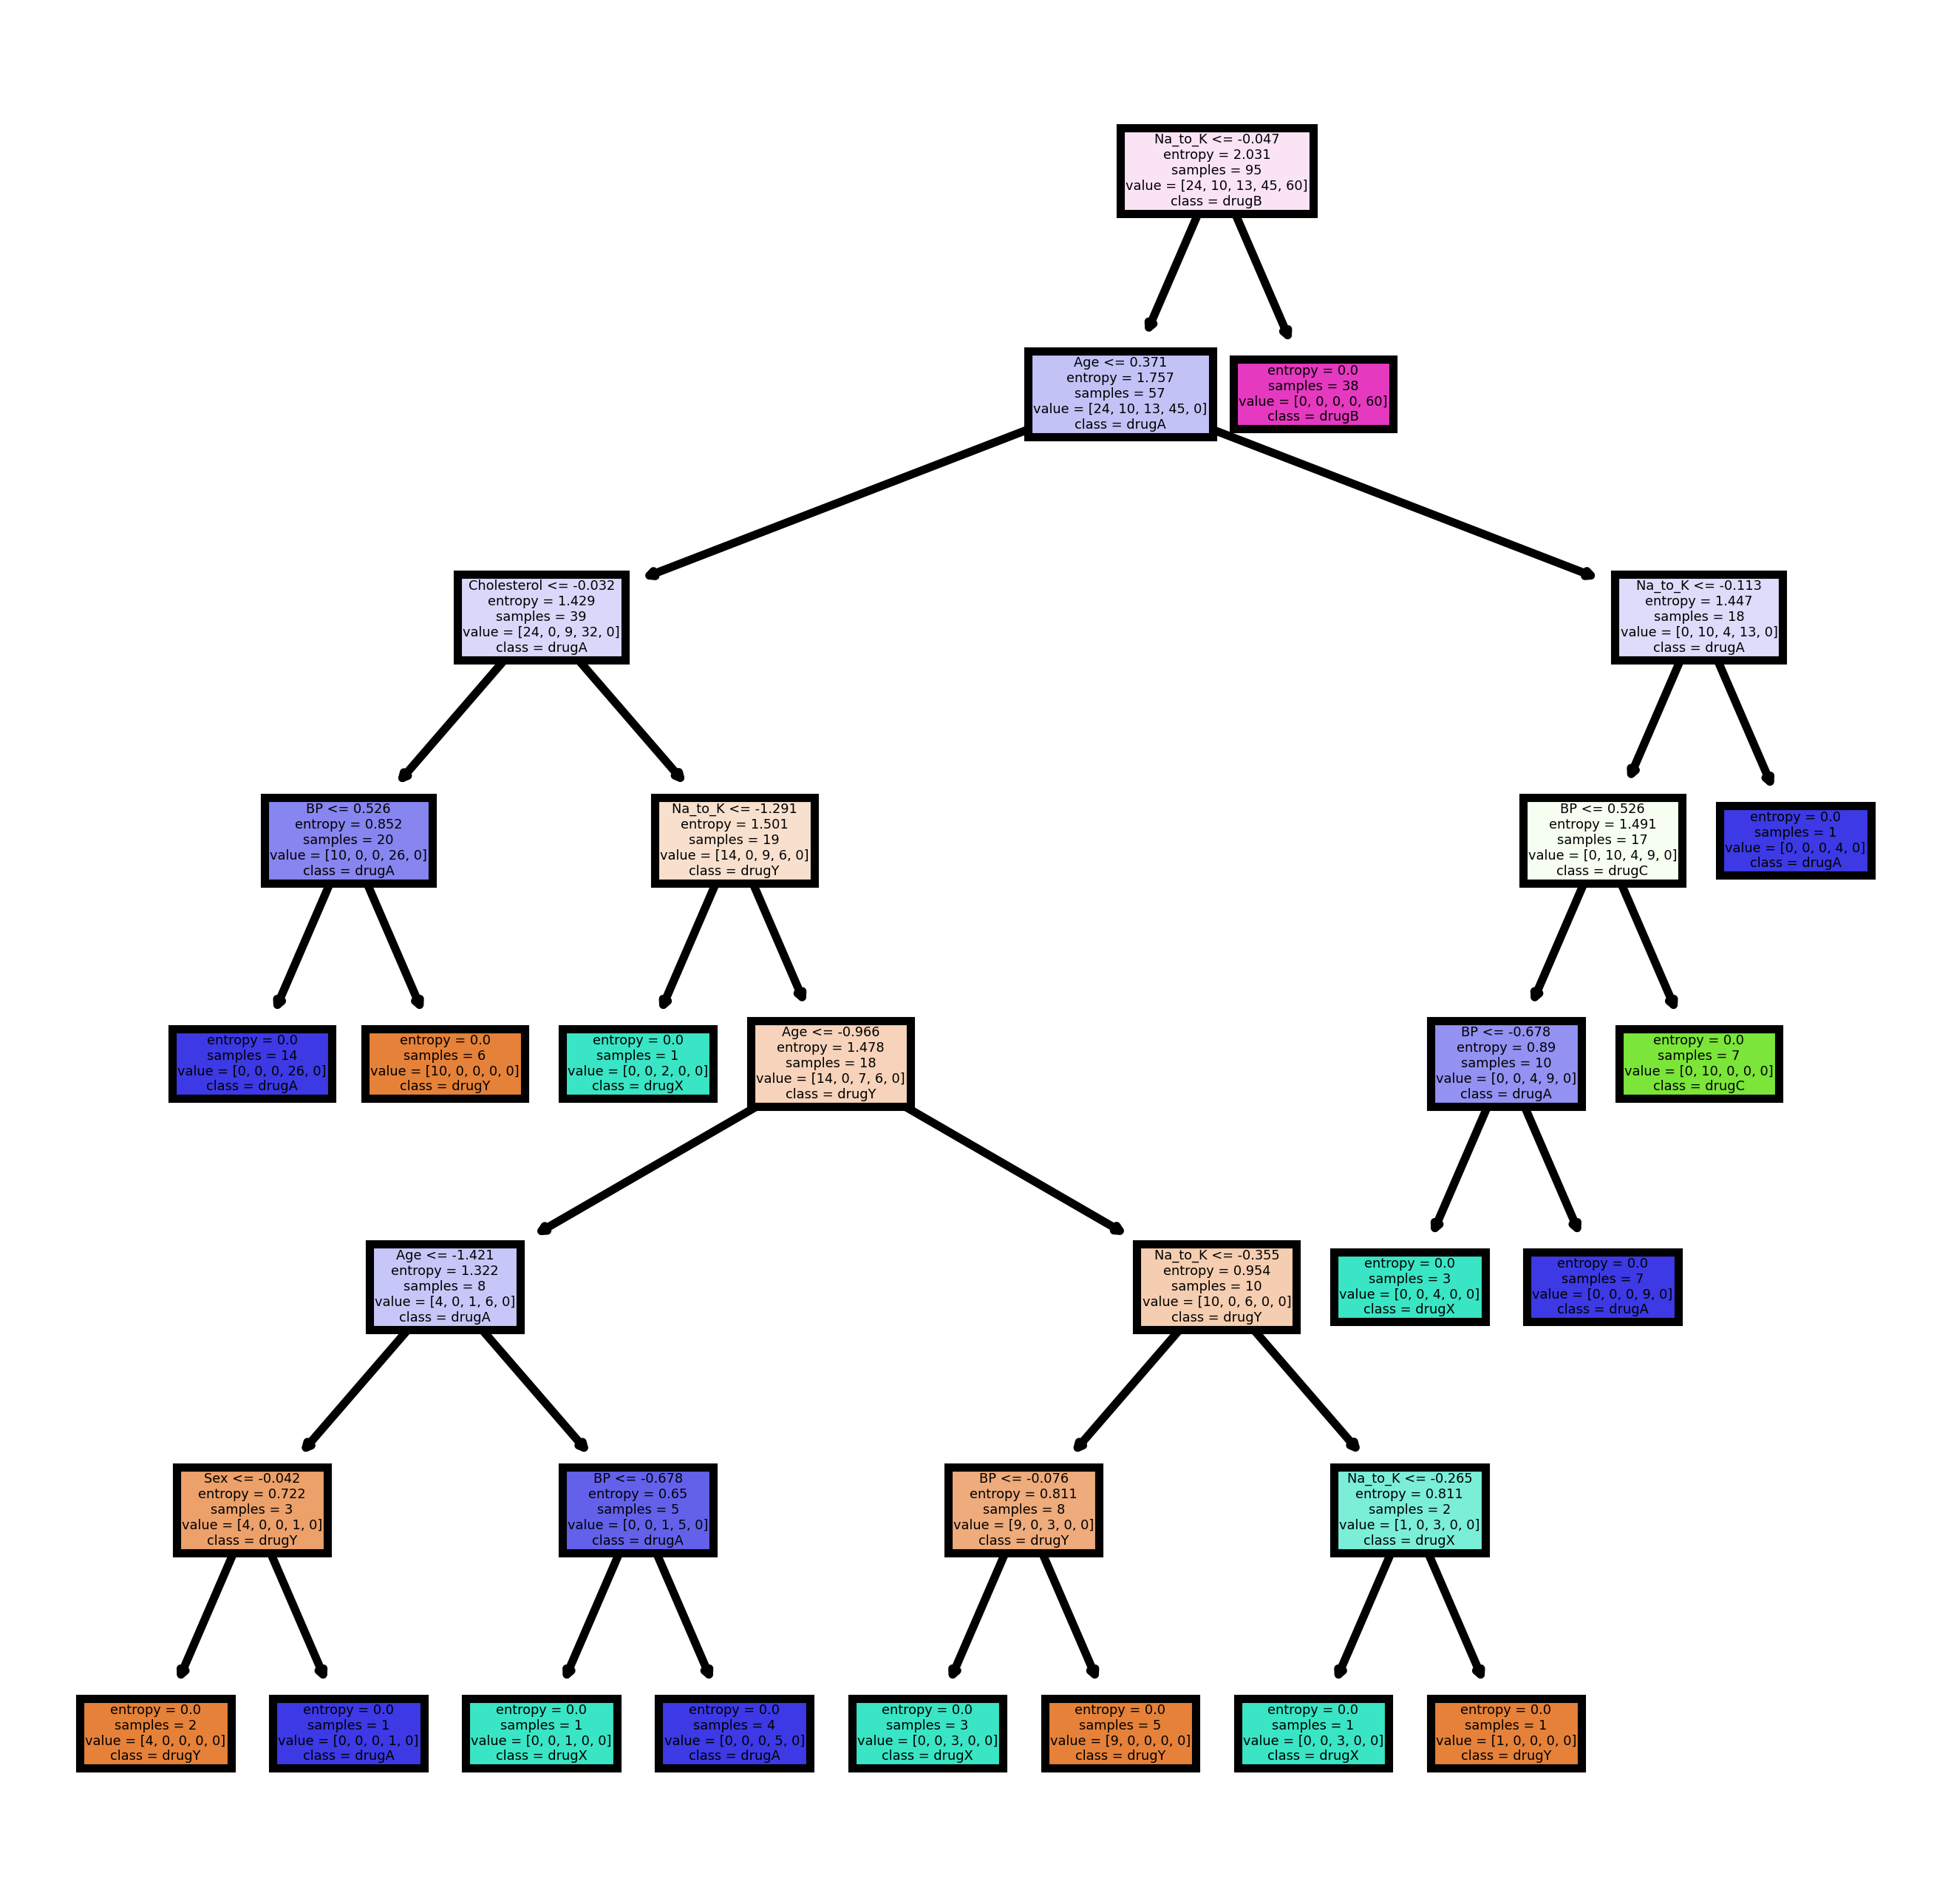

In [137]:
from six import StringIO
import pydotplus
from sklearn.tree import plot_tree
featureNames = df.columns[0:5]
targetNames = df['Drug'].unique().tolist()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(mod_rf.estimators_[0],
 feature_names = featureNames, 
 class_names=targetNames,
 filled = True);
fig.savefig('rf_individualtree.png')
